<center><img src='https://pbs.twimg.com/profile_images/1045191468363608064/QEnRUZy__400x400.jpg'width="200"></center>

<h1 align=center><font size = 6,5> PROJECT ARTIKEL ELECTRIC BUS IN THE WORLD</font></h1>

------------------------------------------------

# A. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# B. Data Collection
Data collection atau pengumpulan data adalah prosedur mengumpulkan, mengukur, dan menganalisis berbagai tipe informasi menggunakan teknik yang berstandar.

In [ ]:
df = pd.read_csv("IEA-EV-dataEV_salesHistoricalBuses.csv")
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Austria,Historical,EV sales,Buses,BEV,2010,Vehicles,8.000
1,Austria,Historical,EV stock,Buses,BEV,2010,Vehicles,110.000
2,Austria,Historical,EV stock share,Buses,EV,2010,percent,1.200
3,Austria,Historical,EV sales share,Buses,EV,2010,percent,1.100
4,Austria,Historical,EV sales share,Buses,EV,2011,percent,0.830
...,...,...,...,...,...,...,...,...
1495,World,Historical,Oil displacement Mbd,Buses,EV,2022,Milion barrels per day,0.087
1496,World,Historical,"Oil displacement, million lge",Buses,EV,2022,"Oil displacement, million lge",5200.000
1497,World,Historical,EV sales,Buses,BEV,2022,Vehicles,63000.000
1498,World,Historical,EV stock,Buses,BEV,2022,Vehicles,700000.000


**Dataset ini berisi beberapa variabel, diantaranya adalah sebagai berikut:** <br>
`Region :` Negara yang menjual electric bus di seluruh dunia <br>
`Category :` Kategori (Historical) <br>
`Parameter :` Parameter electric bus (EV sales, EV stock, EV stock share, EV sales share, Oil Displacement Mbd, Oil displacement, million ige, dan electricity demand) <br>
`Mode :` Mode kendaraan yang dijual (Bis) <br>
`Powertrain :` Rangkaian daya untuk pengisian electric bus (EV, BEV, dan PHEV) <br>
`Year :` Tahun <br>
`Value :` Jumlah electric bus <br>
`Unit :` Satuan dari value (Vehicle, percent, Milion barrels per day, Oil displacement, million lge, dan GWh)

**Sumber data :** https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer?gclid=CjwKCAjwnOipBhBQEiwACyGLugEjvLOMEk1Vm_hCqnzrUM5HNVlxTPfTR8wR5C5VCh2SmgmUdSQeLBoCP0UQAvD_BwE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1500 non-null   object 
 1   category    1500 non-null   object 
 2   parameter   1500 non-null   object 
 3   mode        1500 non-null   object 
 4   powertrain  1500 non-null   object 
 5   year        1500 non-null   int64  
 6   unit        1500 non-null   object 
 7   value       1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


# C. Data Cleaning

In [ ]:
# Untuk memeriksa dataset memiliki nilai null atau tidak
df.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [ ]:
# Untuk memeriksa dataset memiliki nilai duplikat atau tidak
df.duplicated().sum()

0

**Kesimpulan**

Data tersebut tidak memiliki nilai null dan juga data duplikat. Oleh karena itu, data tersebut sudah bisa langsung bisa masuk ke proses selanjutnya yaitu Explanatory Data Analysis (EDA).

## D. Explanatory Data Analysis (EDA)
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Pada data ini, kami ingin melakukan EDA pada beberapa variabel saja, diantaranya adalah region, parameter, powertrain, year, unit, dan value.

**A.	Univariate Analysis : Analisis deskriptif dengan satu variabel.**

### Bagaimana trend electric bus berdasarkan wilayah?

In [ ]:
reg = df['region'].value_counts()
reg

World                115
China                115
Europe               109
EU27                  70
Rest of the world     68
Other Europe          64
United Kingdom        62
France                60
Belgium               53
Austria               52
Korea                 50
Sweden                48
Denmark               47
Netherlands           47
Japan                 46
New Zealand           45
Spain                 42
India                 41
Germany               38
Switzerland           38
Poland                34
Norway                33
Finland               33
Portugal              32
Israel                30
Brazil                30
Iceland               28
Italy                 28
Canada                24
Greece                18
Name: region, dtype: int64

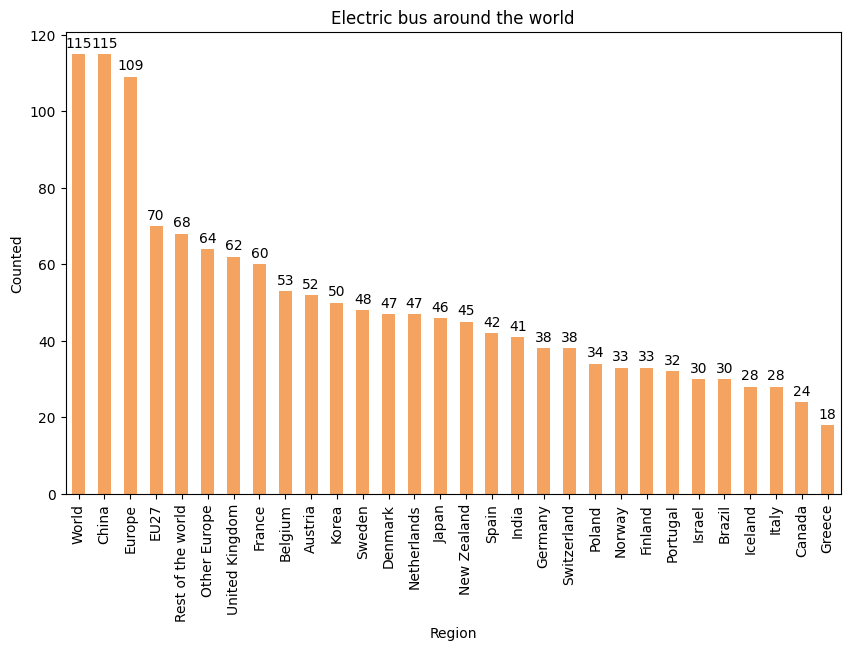

In [ ]:
reg.plot(kind='bar', figsize=(10, 6), color='sandybrown')

for i, v in enumerate(reg):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Electric bus around the world')
plt.ylabel('Counted')
plt.xlabel('Region')

plt.show()

**Kesimpulan:**
- World dan China merupakan negara dengan jumlah electric bus terbanyak diantara negara lain, yaitu sebanyak 115 unit.
- Greece merupakan negara dengan jumlah electric bus paling sedikit diantara negara lain, yaitu sebanyak 18 unit.

### Apa saja jenis parameter dari electric bus?

In [ ]:
par = pd.DataFrame({"Total":df["parameter"].value_counts()})
par

,Total
EV stock,420
EV sales,352
EV stock share,292
EV sales share,263
Oil displacement Mbd,60
"Oil displacement, million lge",60
Electricity demand,53


In [ ]:
total_par = par["Total"]

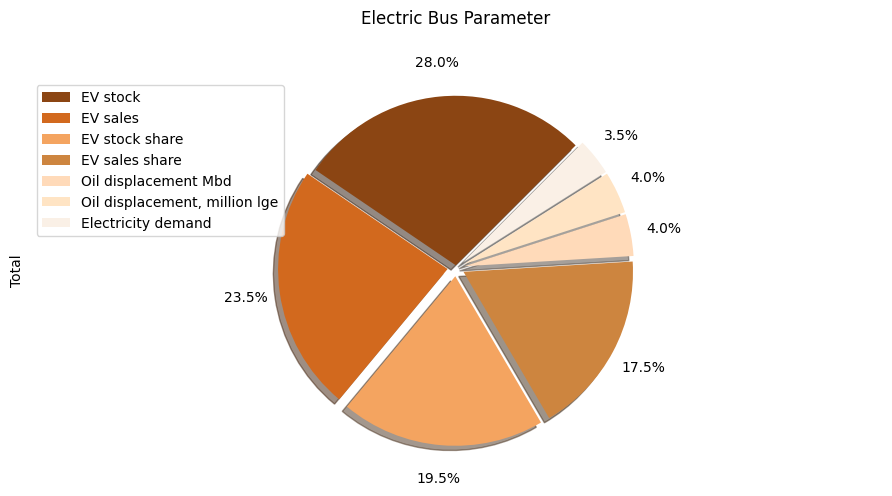

In [ ]:
#pilih warna
colors_list = ['saddlebrown','chocolate','sandybrown','peru','peachpuff','bisque','linen']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

#Tambahkan details
total_par.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=total_par.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Electric Bus Parameter',y=1.12)

#menampilkan
plt.show()

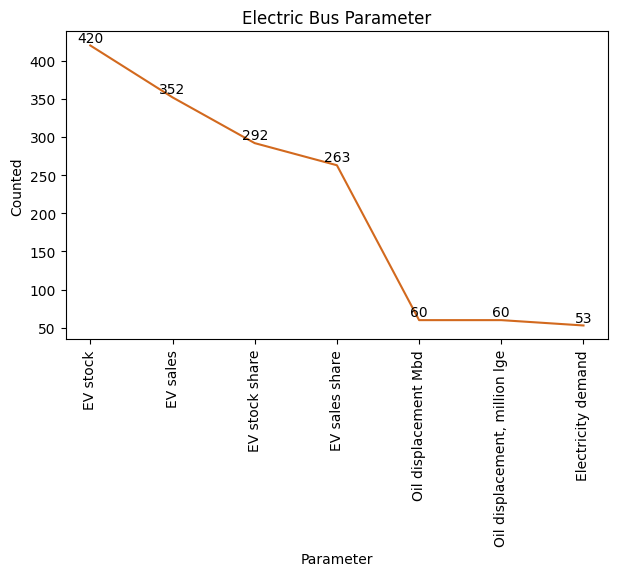

In [ ]:
total_par.plot(kind='line', figsize=(7, 4), color='chocolate')

for i, v in enumerate(total_par):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Electric Bus Parameter')
plt.ylabel('Counted')
plt.xlabel('Parameter')

plt.xticks(rotation=90)
plt.show()

**Kesimpulan**
- EV Stock merupakan parameter terbanyak, yaitu sebanyak 420 unit (28%).
- Electricity demand merupakan parameter paling sedikit, yaitu sebanyak 53 unit (3.5%).

### Apa saja jenis unit dari electric bus?

In [ ]:
unit = pd.DataFrame({"Total":df["unit"].value_counts()})
unit

,Total
Vehicles,772
percent,555
Milion barrels per day,60
"Oil displacement, million lge",60
GWh,53


In [ ]:
total_unit = unit["Total"]

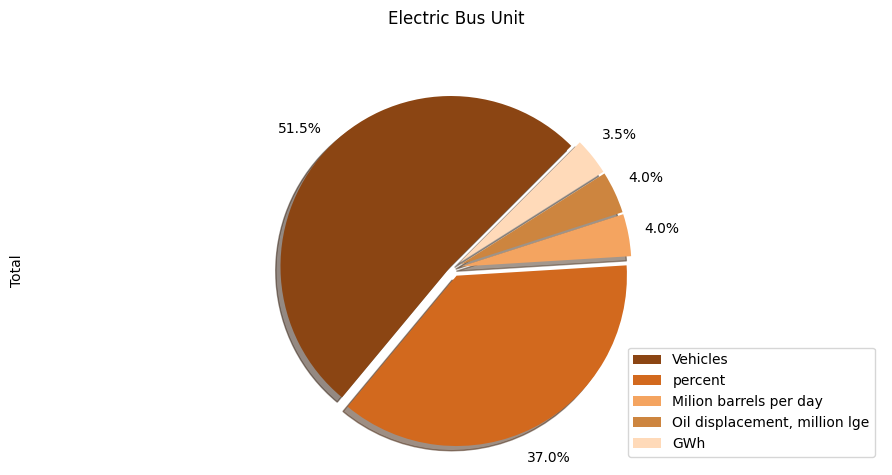

In [ ]:
#pilih warna
colors_list = ['saddlebrown','chocolate','sandybrown','peru','peachpuff']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05, 0.05, 0.05, 0.05]

#Tambahkan details
total_unit.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=total_unit.index,loc='lower right')
plt.axis('equal')

#menambahkan judul
plt.title('Electric Bus Unit',y=1.12)

#menampilkan
plt.show()

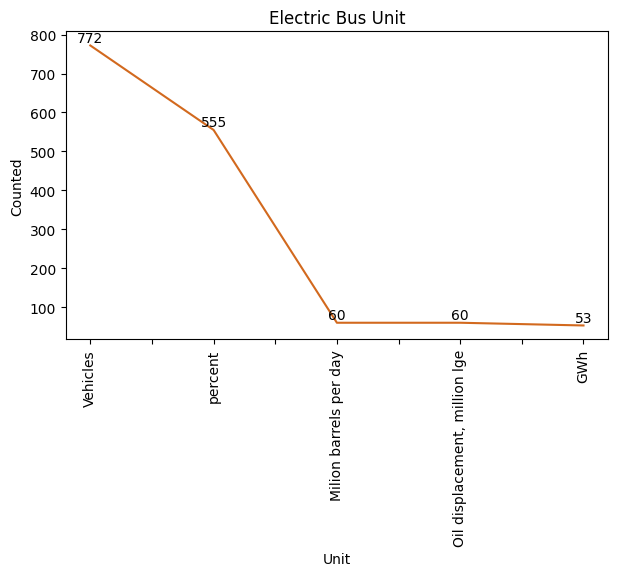

In [ ]:
total_unit.plot(kind='line', figsize=(7, 4), color='chocolate')

for i, v in enumerate(total_unit):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Electric Bus Unit')
plt.ylabel('Counted')
plt.xlabel('Unit')

plt.xticks(rotation=90)
plt.show()

**Kesimpulan**
- Vehicle merupakan unit terbanyak, yaitu sebanyak 772 unit (51.5%).
- GWh merupakan unit paling sedikit, yaitu sebanyak 53 unit (3.5%).

### Menggunakan filtering dataset "Parameter = EV_Sales"

**B. Bivariate analysis - analisis relasi dengan dua variabel yang biasanya dengan target variabel.**
#### Bagaimana trend penjualan electric bus dari tahun ke tahun?

In [ ]:
# Filter dataset EV_Sales
EV_Sales = df.loc[df['parameter'] == 'EV sales']
EV_Sales

,region,category,parameter,mode,powertrain,year,unit,value
0,Austria,Historical,EV sales,Buses,BEV,2010,Vehicles,8.0
7,Austria,Historical,EV sales,Buses,BEV,2011,Vehicles,5.0
8,Austria,Historical,EV sales,Buses,BEV,2012,Vehicles,14.0
15,Austria,Historical,EV sales,Buses,BEV,2013,Vehicles,15.0
16,Austria,Historical,EV sales,Buses,BEV,2014,Vehicles,1.0
...,...,...,...,...,...,...,...,...
1479,World,Historical,EV sales,Buses,BEV,2020,Vehicles,70000.0
1484,World,Historical,EV sales,Buses,BEV,2021,Vehicles,55000.0
1489,World,Historical,EV sales,Buses,PHEV,2021,Vehicles,1900.0
1492,World,Historical,EV sales,Buses,PHEV,2022,Vehicles,2400.0


In [ ]:
# Menyimpan data ke folder
#EV_Sales.to_csv('EV_Sales_NEW.csv',index=False)

In [ ]:
# Menghapus 1 row yang tidak sesuai value nya
value_error = EV_Sales.loc[EV_Sales['value'] == 0.0010000000474974]
value_error

,region,category,parameter,mode,powertrain,year,unit,value
718,Israel,Historical,EV sales,Buses,BEV,2013,Vehicles,0.001


In [ ]:
EV_SalesNew = EV_Sales.drop(718)
EV_SalesNew

,region,category,parameter,mode,powertrain,year,unit,value
0,Austria,Historical,EV sales,Buses,BEV,2010,Vehicles,8.0
7,Austria,Historical,EV sales,Buses,BEV,2011,Vehicles,5.0
8,Austria,Historical,EV sales,Buses,BEV,2012,Vehicles,14.0
15,Austria,Historical,EV sales,Buses,BEV,2013,Vehicles,15.0
16,Austria,Historical,EV sales,Buses,BEV,2014,Vehicles,1.0
...,...,...,...,...,...,...,...,...
1479,World,Historical,EV sales,Buses,BEV,2020,Vehicles,70000.0
1484,World,Historical,EV sales,Buses,BEV,2021,Vehicles,55000.0
1489,World,Historical,EV sales,Buses,PHEV,2021,Vehicles,1900.0
1492,World,Historical,EV sales,Buses,PHEV,2022,Vehicles,2400.0


#### Bagaimana trend penjualan electric bus dari tahun ke tahun?

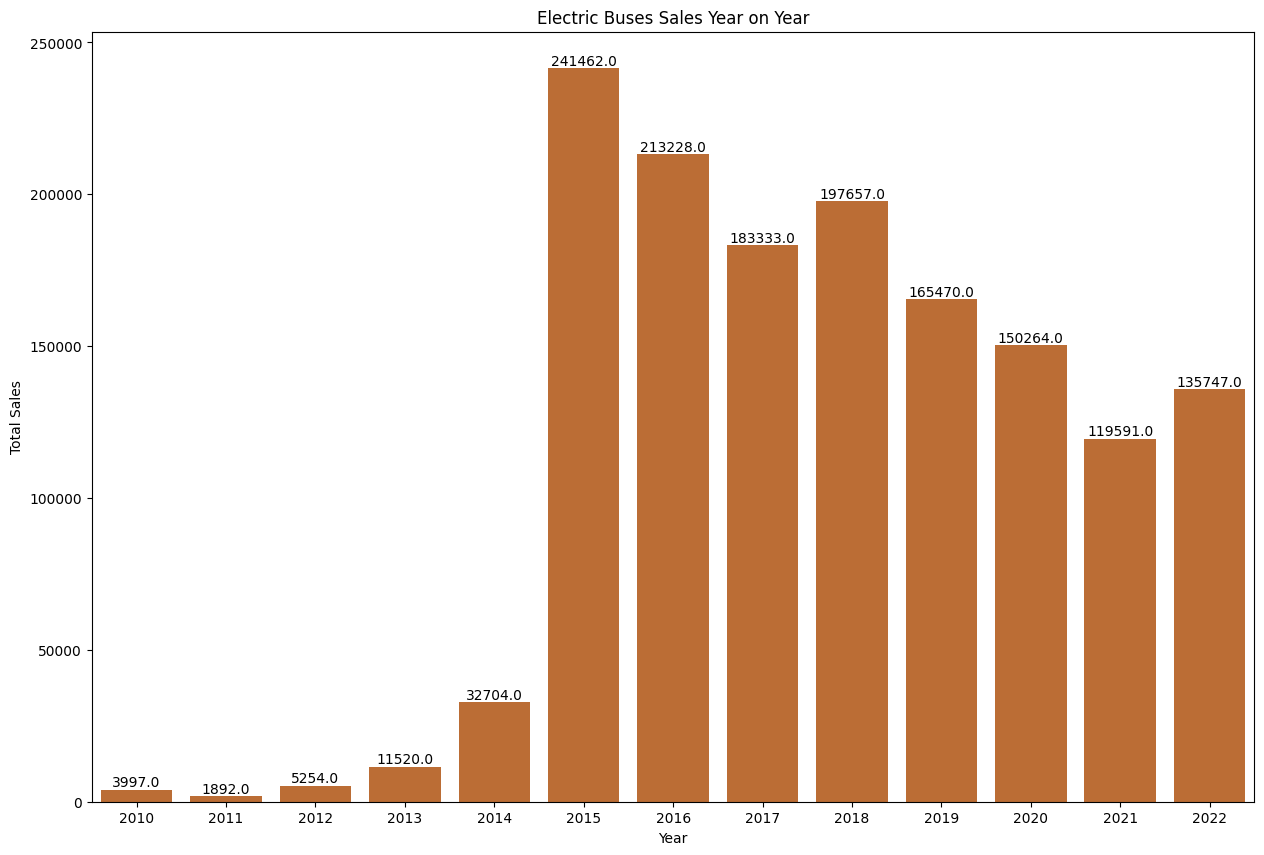

In [ ]:
year_sales = EV_SalesNew.groupby('year')['value'].sum().reset_index().sort_values('year', ascending=True)
colors = ['chocolate'] * len(EV_SalesNew)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = 'year', y = 'value', data = year_sales, palette=colors)

for i, v in enumerate(year_sales['value']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.title('Electric Buses Sales Year on Year')
plt.show()

**Kesimpulan**
- Grafik electric bus sales year on year merupakan grafik fluktuatif (naik turun). Artinya, electric bus sales tidak stabil karena mengalami penurunan dan kenaikan penjualan dari rentang tahun 2010 - 2022.
- Tahun 2015 merupakan tahun dengan penjualan electric bus terbanyak, yaitu sebanyak 241.462 unit.
- Tahun 2011 merupakan tahun dengan penjualan electric bus paling sedikit, yaitu sebanyak 1.892 unit.

#### Berapa persentase dan jumlah penjualan electric bus berdasarkan powertrain?

In [ ]:
pw_sales = EV_SalesNew.groupby('powertrain')['value'].sum().reset_index().sort_values('powertrain', ascending=True)
colors = ['chocolate'] * len(EV_SalesNew)
pw_sales

,powertrain,value
0,BEV,1316164.0
1,PHEV,145955.0


In [ ]:
pw_sales.to_csv("pw_sales.csv", index=False)

pw_sales = pd.read_csv("pw_sales.csv", index_col = 0)
pw_sales

,value
powertrain,
BEV,1316164.0
PHEV,145955.0


In [ ]:
total_pw_sales = pw_sales["value"]

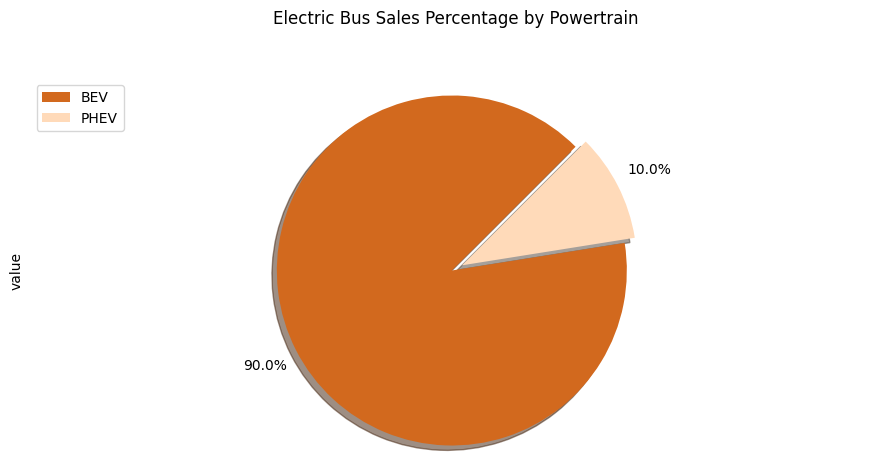

In [ ]:
#pilih warna
colors_list = ['chocolate','peachpuff']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05]

#Tambahkan details
total_pw_sales.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=total_pw_sales.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Electric Bus Sales Percentage by Powertrain',y=1.12)

#menampilkan
plt.show()

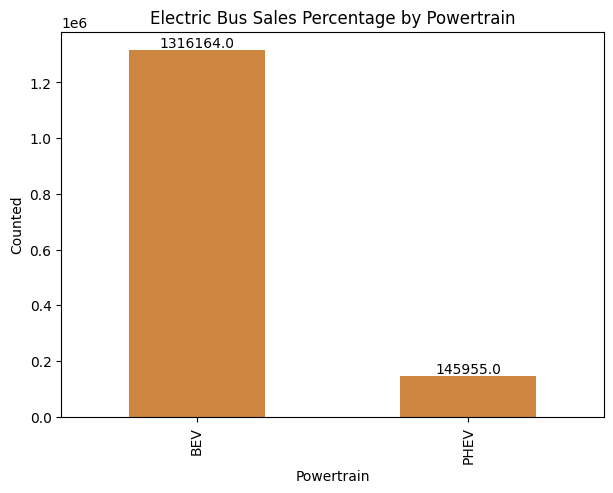

In [ ]:
total_pw_sales.plot(kind='bar', figsize=(7, 5), color='peru')

for i, v in enumerate(total_pw_sales):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Electric Bus Sales Percentage by Powertrain')
plt.ylabel('Counted')
plt.xlabel('Powertrain')

plt.show()

**Kesimpulan :**
- BEV adalah powertrain terbanyak dalam electric bus sales, yaitu sebanyak 1.316.164 unit (90%)
- PHEV adalah powertrain paling sedikit dalam electric bus sales, yaitu sebanyak 145.955 unit (10%)

**C. Multivariat Analysis : analisis yang menggunakan lebih dari atau sama dengan tiga variabel.**
#### Bagaimana grafik pergerakan penjualan electric bus dari Top 5 Region tahun 2010 - 2022?

In [ ]:
EV_SalesNew['region'].value_counts().head(5)

World           25
China           25
EU27            22
Europe          22
Other Europe    19
Name: region, dtype: int64

In [ ]:
A = EV_SalesNew[(EV_Sales['year'] > 2008)].groupby(['region','year'])['value'].sum()
A

<ipython-input-28-25c02eecae40>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = EV_SalesNew[(EV_Sales['year'] > 2008)].groupby(['region','year'])['value'].sum()


region   year
Austria  2010        8.0
         2011        5.0
         2012       14.0
         2013       15.0
         2014        1.0
                  ...   
World    2018    98600.0
         2019    81700.0
         2020    73700.0
         2021    56900.0
         2022    65400.0
Name: value, Length: 270, dtype: float64

In [ ]:
Ch = A['China']
Ch

year
2010      1900.0
2011       780.0
2012      2400.0
2013      5500.0
2014     16100.0
2015    120000.0
2016    105000.0
2017     90480.0
2018     96400.0
2019     77600.0
2020     65600.0
2021     49700.0
2022     54300.0
Name: value, dtype: float64

In [ ]:
In = A['India']
In

year
2015     100.0
2016      25.0
2017      20.0
2018     210.0
2019     460.0
2020    2200.0
2021    1200.0
2022    2000.0
Name: value, dtype: float64

In [ ]:
Fr = A['France']
Fr

year
2010     16.0
2011     21.0
2012     25.0
2013     24.0
2014     40.0
2015     51.0
2016     75.0
2017     17.0
2018     95.0
2019    280.0
2020    180.0
2021    620.0
2022    802.0
Name: value, dtype: float64

In [ ]:
Ger = A['Germany']
Ger

year
2016    230.0
2017     29.0
2018     43.0
2019    190.0
2020    390.0
2021    615.0
2022    645.0
Name: value, dtype: float64

In [ ]:
UK = A['United Kingdom']
UK

year
2010      4.0
2011      2.0
2012     14.0
2013     23.0
2014     47.0
2015     24.0
2016    199.0
2017     57.0
2018    154.0
2019    120.0
2020    300.0
2021    540.0
2022    440.0
Name: value, dtype: float64

In [ ]:
dfch = Ch.to_frame()
dfch.rename(columns={'value': 'China'}, inplace=True)
dfch.index.name=None
dfch

,China
2010,1900.0
2011,780.0
2012,2400.0
2013,5500.0
2014,16100.0
2015,120000.0
2016,105000.0
2017,90480.0
2018,96400.0
2019,77600.0


In [ ]:
dfin = In.to_frame()
dfin.rename(columns={'value': 'India'}, inplace=True)
dfin.index.name=None
dfin

,India
2015,100.0
2016,25.0
2017,20.0
2018,210.0
2019,460.0
2020,2200.0
2021,1200.0
2022,2000.0


In [ ]:
dffr = Fr.to_frame()
dffr.rename(columns={'value': 'France'}, inplace=True)
dffr.index.name=None
dffr

,France
2010,16.0
2011,21.0
2012,25.0
2013,24.0
2014,40.0
2015,51.0
2016,75.0
2017,17.0
2018,95.0
2019,280.0


In [ ]:
dfger = Ger.to_frame()
dfger.rename(columns={'value': 'Germany'}, inplace=True)
dfger.index.name=None
dfger

,Germany
2016,230.0
2017,29.0
2018,43.0
2019,190.0
2020,390.0
2021,615.0
2022,645.0


In [ ]:

dfuk = UK.to_frame()
dfuk.rename(columns={'value': 'United Kingdom'}, inplace=True)
dfuk.index.name=None
dfuk

,United Kingdom
2010,4.0
2011,2.0
2012,14.0
2013,23.0
2014,47.0
2015,24.0
2016,199.0
2017,57.0
2018,154.0
2019,120.0


In [ ]:
df_top5 = pd.concat([dfch,dfin,dffr,dfger,dfuk], axis=1)
df_top5

,China,India,France,Germany,United Kingdom
2010,1900.0,NaN,16.0,NaN,4.0
2011,780.0,NaN,21.0,NaN,2.0
2012,2400.0,NaN,25.0,NaN,14.0
2013,5500.0,NaN,24.0,NaN,23.0
2014,16100.0,NaN,40.0,NaN,47.0
2015,120000.0,100.0,51.0,NaN,24.0
2016,105000.0,25.0,75.0,230.0,199.0
2017,90480.0,20.0,17.0,29.0,57.0
2018,96400.0,210.0,95.0,43.0,154.0
2019,77600.0,460.0,280.0,190.0,120.0


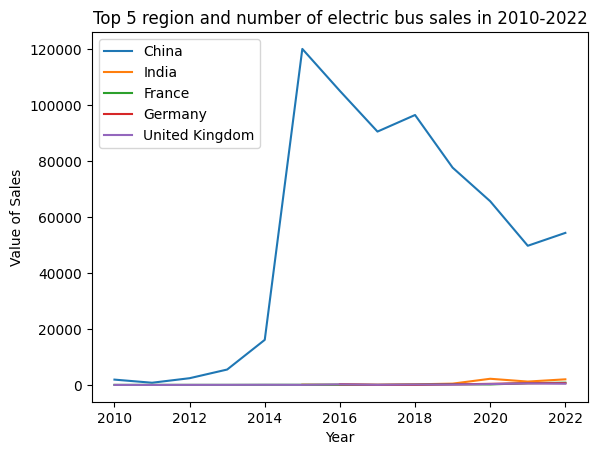

In [ ]:
df_top5.plot() # memanggil plot line

plt.rcParams['figure.figsize'] = [12,10] #mengubah ukuran canvas plot line
plt.xlabel('Year') #menyeting label x
plt.ylabel('Value of Sales') #menyeting label y
plt.title('Top 5 region and number of electric bus sales in 2010-2022') #judul plot line
plt.show() #menampilkan

**Kesimpulan :**
-	Pada grafik ini, yang ditampilkan adalah Top 5 region of electric bus sales saja. Tidak termasuk negara-negara gabungan seperti World, EU27, Europe, dll.
-	Top 5 Region dengan penjualan electric bus terbanyak adalah China, India, France, Germany, dan United Kingdom.
-	China sangat mendominasi dalam electric bus sales. Bisa di lihat pada grafiknya, China melonjak naik dari tahun 2010 - 2022. Sedangkan negara lainnya, cenderung bergerak monoton.
-	Grafik top 5 region and number of electric bus sales in 2010-2022 merupakan grafik menaik. Artinya, electric bus sales mengalami kenaikan penjualan dari rentang tahun 2010 - 2022.



### Menggunakan filtering dataset "Parameter = EV_Stock"
#### Bagaimana trend ketersediaan electric bus dari tahun ke tahun?

In [ ]:
# Filter dataset EV_Sales
EV_Stock = df.loc[df['parameter'] == 'EV stock']
EV_Stock

,region,category,parameter,mode,powertrain,year,unit,value
1,Austria,Historical,EV stock,Buses,BEV,2010,Vehicles,110.0
6,Austria,Historical,EV stock,Buses,BEV,2011,Vehicles,120.0
9,Austria,Historical,EV stock,Buses,BEV,2012,Vehicles,130.0
14,Austria,Historical,EV stock,Buses,BEV,2013,Vehicles,140.0
17,Austria,Historical,EV stock,Buses,BEV,2014,Vehicles,130.0
...,...,...,...,...,...,...,...,...
1480,World,Historical,EV stock,Buses,BEV,2020,Vehicles,500000.0
1483,World,Historical,EV stock,Buses,BEV,2021,Vehicles,550000.0
1490,World,Historical,EV stock,Buses,PHEV,2021,Vehicles,82000.0
1491,World,Historical,EV stock,Buses,PHEV,2022,Vehicles,100000.0


#### Bagaimana trend persediaan electric bus dari tahun ke tahun?

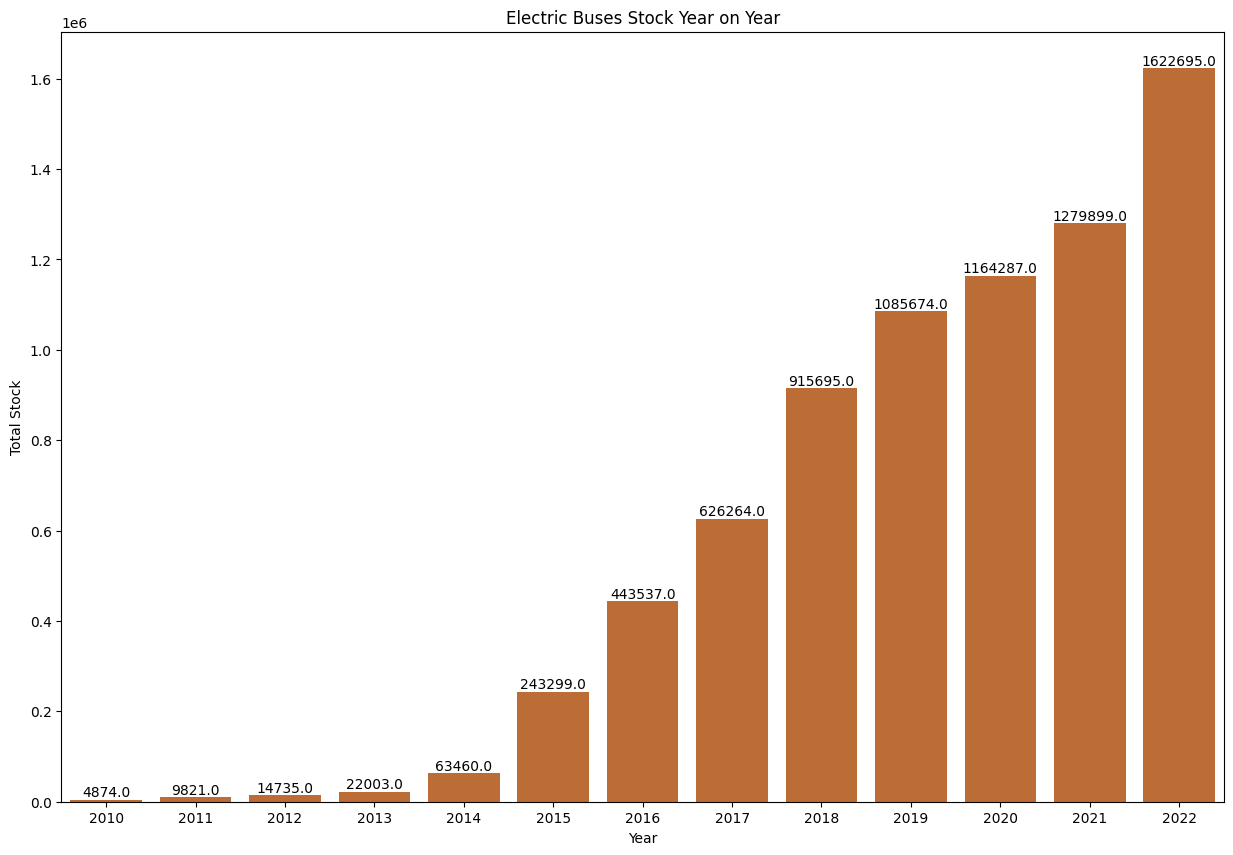

In [ ]:
year_stock = EV_Stock.groupby('year')['value'].sum().reset_index().sort_values('value', ascending=True)
colors = ['chocolate'] * len(EV_Stock)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = 'year', y = 'value', data = year_stock, palette=colors)

for i, v in enumerate(year_stock['value']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.ylabel('Total Stock')
plt.xlabel('Year')
plt.title('Electric Buses Stock Year on Year')
plt.show()

**Kesimpulan**
- Grafik electric bus stock year on year merupakan grafik menaik. Artinya, electric bus stock mengalami kenaikan persediaan setiap tahunnya dari rentang tahun 2010 - 2022.
- Tahun 2022 merupakan tahun dengan persediaan electric bus terbanyak, yaitu sebanyak 1.622.695 unit.
- Tahun 2011 merupakan tahun dengan persediaan electric bus paling sedikit, yaitu sebanyak 4.874 unit.

#### Berapa persentase dan jumlah ketersediaan electric bus berdasarkan powertrain?

In [ ]:
pw_stock = EV_Stock.groupby('powertrain')['value'].sum().reset_index().sort_values('powertrain', ascending=True)
colors = ['chocolate'] * len(EV_Stock)
pw_stock

,powertrain,value
0,BEV,6466035.0
1,PHEV,1030208.0


In [ ]:
pw_stock.to_csv("pw_stock.csv", index=False)

pw_stock = pd.read_csv("pw_stock.csv", index_col = 0)
pw_stock

,value
powertrain,
BEV,6466035.0
PHEV,1030208.0


In [ ]:
total_pw_stock = pw_stock['value']

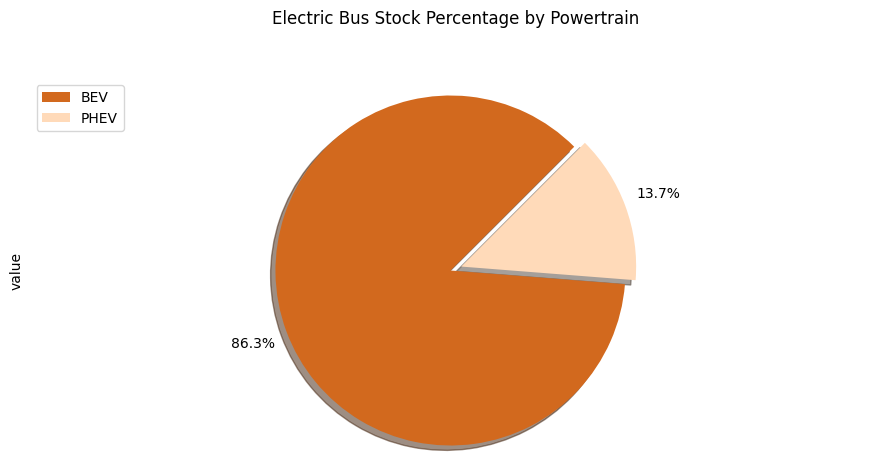

In [ ]:
#pilih warna
colors_list = ['chocolate','peachpuff']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05]

#Tambahkan details
total_pw_stock.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=total_pw_stock.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Electric Bus Stock Percentage by Powertrain',y=1.12)

#menampilkan
plt.show()

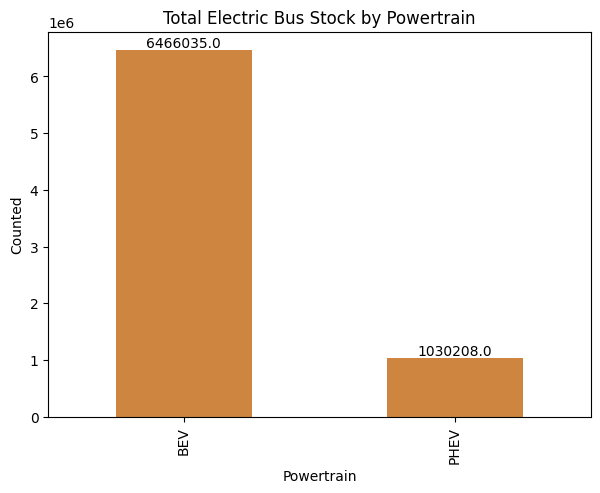

In [ ]:
total_pw_stock.plot(kind='bar', figsize=(7, 5), color='peru')

for i, v in enumerate(total_pw_stock):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Total Electric Bus Stock by Powertrain')
plt.ylabel('Counted')
plt.xlabel('Powertrain')

plt.show()

**Keterangan**
- BEV adalah powertrain terbanyak dalam electric bus stock, yaitu sebanyak 6.466.035 unit (86.3%)
- PHEV adalah powertrain paling sedikit dalam electric bus stock, yaitu sebanyak 1.030.208 unit (13.7%)

#### Bagaimana grafik pergerakan ketersediaan electric bus dari Top 5 Region tahun 2010 - 2022?

In [ ]:
EV_Stock['region'].value_counts().head(5)

World      25
China      25
EU27       22
Europe     22
Belgium    22
Name: region, dtype: int64

In [ ]:
B = EV_Stock[(EV_Stock['year'] > 2008)].groupby(['region','year'])['value'].sum()
B

region   year
Austria  2010       110.0
         2011       120.0
         2012       130.0
         2013       140.0
         2014       130.0
                   ...   
World    2018    454000.0
         2019    540000.0
         2020    580000.0
         2021    632000.0
         2022    800000.0
Name: value, Length: 292, dtype: float64

In [ ]:
Ch2 = B['China']
Ch2

year
2010      1900.0
2011      4260.0
2012      6580.0
2013     10000.0
2014     30400.0
2015    120000.0
2016    219000.0
2017    310000.0
2018    453000.0
2019    529000.0
2020    559000.0
2021    610000.0
2022    770000.0
Name: value, dtype: float64

In [ ]:
Ko = B['Korea']
Ko

year
2010       5.0
2011       9.0
2012      11.0
2013      17.0
2014      20.0
2015      22.0
2016      52.0
2017      52.0
2018     100.0
2019     220.0
2020    1800.0
2021    3100.0
2022    5200.0
Name: value, dtype: float64

In [ ]:
UK2 = B['United Kingdom']
UK2

year
2010      80.0
2011      88.0
2012     100.0
2013     120.0
2014     170.0
2015     200.0
2016     400.0
2017     450.0
2018     620.0
2019     730.0
2020    1040.0
2021    1620.0
2022    2020.0
Name: value, dtype: float64

In [ ]:
In2 = B['India']
In2

year
2015     100.0
2016     100.0
2017     100.0
2018     100.0
2019     550.0
2020    1100.0
2021    2100.0
2022    3100.0
Name: value, dtype: float64

In [ ]:
Ne = B['Netherlands']
Ne

year
2010      15.0
2011      22.0
2012      23.0
2013      39.0
2014      46.0
2015      94.0
2016     170.0
2017     300.0
2018     400.0
2019     790.0
2020    1200.0
2021    1400.0
2022    1511.0
Name: value, dtype: float64

In [ ]:
dfch2 = Ch2.to_frame()
dfch2.rename(columns={'value': 'China'}, inplace=True)
dfch2.index.name=None
dfch2

,China
2010,1900.0
2011,4260.0
2012,6580.0
2013,10000.0
2014,30400.0
2015,120000.0
2016,219000.0
2017,310000.0
2018,453000.0
2019,529000.0


In [ ]:
dfko = Ko.to_frame()
dfko.rename(columns={'value': 'Korea'}, inplace=True)
dfko.index.name=None
dfko

,Korea
2010,5.0
2011,9.0
2012,11.0
2013,17.0
2014,20.0
2015,22.0
2016,52.0
2017,52.0
2018,100.0
2019,220.0


In [ ]:
dfUK2 = UK2.to_frame()
dfUK2.rename(columns={'value': 'United Kingdom'}, inplace=True)
dfUK2.index.name=None
dfUK2

,United Kingdom
2010,80.0
2011,88.0
2012,100.0
2013,120.0
2014,170.0
2015,200.0
2016,400.0
2017,450.0
2018,620.0
2019,730.0


In [ ]:
dfIn2 = In2.to_frame()
dfIn2.rename(columns={'value': 'India'}, inplace=True)
dfIn2.index.name=None
dfIn2

,India
2015,100.0
2016,100.0
2017,100.0
2018,100.0
2019,550.0
2020,1100.0
2021,2100.0
2022,3100.0


In [ ]:
dfNe = Ne.to_frame()
dfNe.rename(columns={'value': 'Netherlands'}, inplace=True)
dfNe.index.name=None
dfNe

,Netherlands
2010,15.0
2011,22.0
2012,23.0
2013,39.0
2014,46.0
2015,94.0
2016,170.0
2017,300.0
2018,400.0
2019,790.0


In [ ]:
df_top5_stock = pd.concat([dfch2,dfko,dfUK2,dfIn2,dfNe], axis=1)
df_top5_stock

,China,Korea,United Kingdom,India,Netherlands
2010,1900.0,5.0,80.0,NaN,15.0
2011,4260.0,9.0,88.0,NaN,22.0
2012,6580.0,11.0,100.0,NaN,23.0
2013,10000.0,17.0,120.0,NaN,39.0
2014,30400.0,20.0,170.0,NaN,46.0
2015,120000.0,22.0,200.0,100.0,94.0
2016,219000.0,52.0,400.0,100.0,170.0
2017,310000.0,52.0,450.0,100.0,300.0
2018,453000.0,100.0,620.0,100.0,400.0
2019,529000.0,220.0,730.0,550.0,790.0


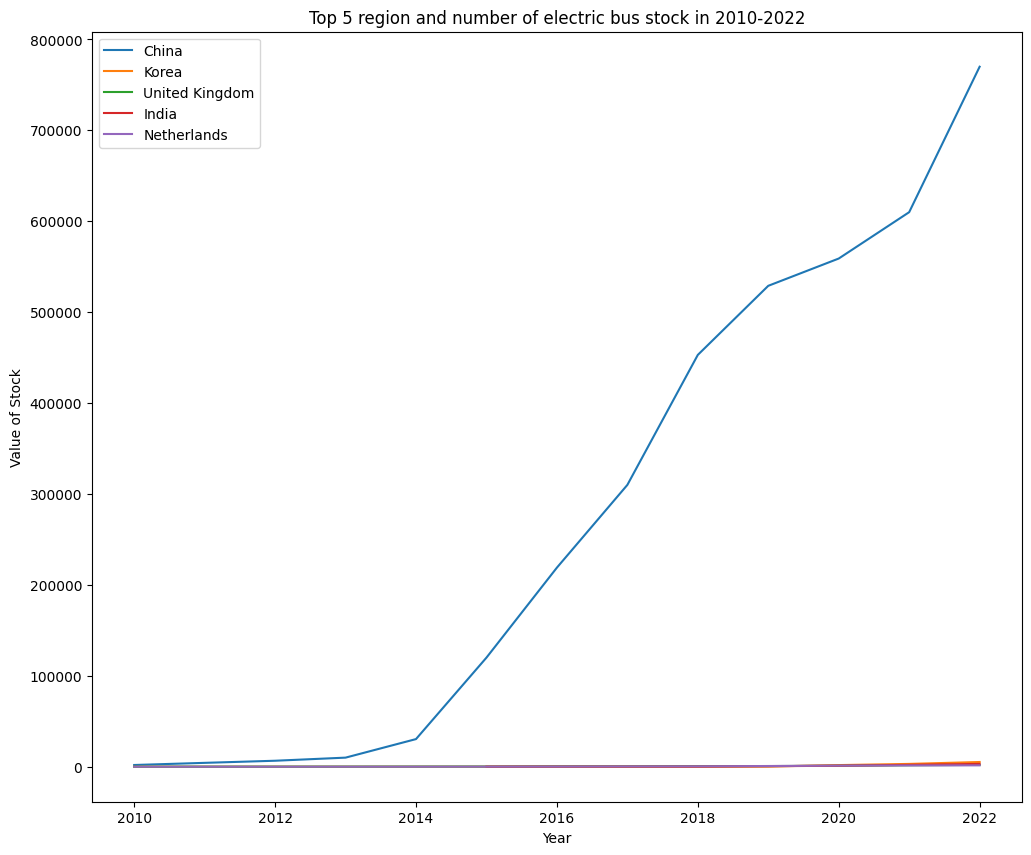

In [ ]:
df_top5_stock.plot() # memanggil plot line
plt.rcParams['figure.figsize'] = [12,10] #mengubah ukuran canvas plot line
plt.xlabel('Year') #menyeting label x
plt.ylabel('Value of Stock') #menyeting label y
plt.title('Top 5 region and number of electric bus stock in 2010-2022') #judul plot line
plt.show() #menampilkan

**Keterangan**
-	Pada grafik ini, yang ditampilkan adalah Top 5 region of electric bus sales saja. Tidak termasuk negara-negara gabungan seperti World, EU27, Europe, dll.
-	Top 5 Region dengan persediaan electric bus terbanyak adalah China, Korea, United, Kingdom, India, Netherlands.
-	China sangat mendominasi dalam electric bus stock. Bisa di lihat pada grafiknya, China melonjak naik dari tahun 2010 - 2022. Sedangkan negara lainnya, cenderung bergerak monoton.
-	Grafik top 5 region and number of electric bus stock in 2010-2022 merupakan grafik menaik. Artinya, electric bus stock mengalami kenaikan ketersediaan dari rentang tahun 2010 - 2022.


### Perbandingan antara top 5 ev bus sales dan top 5 ev bus stock

#### Bagaimana grafik total penjualan electric bus dari Top 5 Region tahun 2010 - 2022?

In [ ]:
sum_row = df_top5.sum()
sum_row

China             685760.0
India               6215.0
France              2246.0
Germany             2142.0
United Kingdom      1924.0
dtype: float64

In [ ]:
df_top5.loc['Total'] = sum_row
df_top5

,China,India,France,Germany,United Kingdom
2010,1900.0,NaN,16.0,NaN,4.0
2011,780.0,NaN,21.0,NaN,2.0
2012,2400.0,NaN,25.0,NaN,14.0
2013,5500.0,NaN,24.0,NaN,23.0
2014,16100.0,NaN,40.0,NaN,47.0
2015,120000.0,100.0,51.0,NaN,24.0
2016,105000.0,25.0,75.0,230.0,199.0
2017,90480.0,20.0,17.0,29.0,57.0
2018,96400.0,210.0,95.0,43.0,154.0
2019,77600.0,460.0,280.0,190.0,120.0


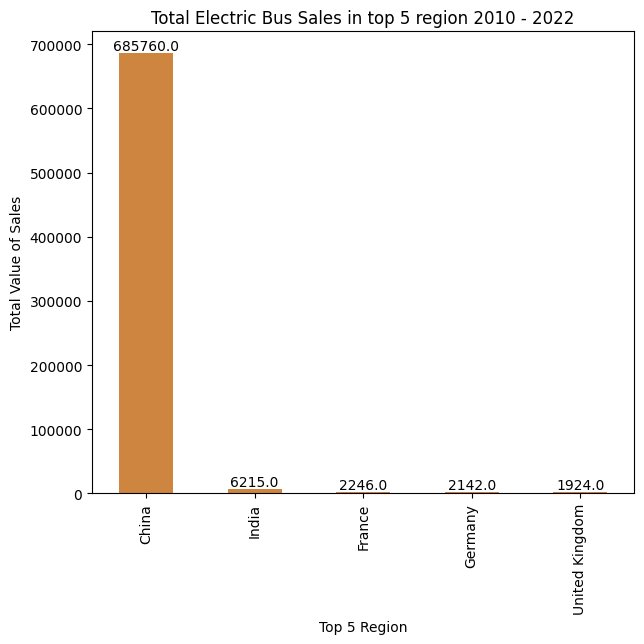

In [ ]:
df_top5.loc['Total'].plot(kind='bar', figsize=(7, 6), color='peru')

for i, v in enumerate(df_top5.loc['Total']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Total Electric Bus Sales in top 5 region 2010 - 2022')
plt.ylabel('Total Value of Sales')
plt.xlabel('Top 5 Region')

plt.show()

**Kesimpulan :**
- Electric bus di China terjual sangat banyak, yaitu sejumlah 685.760 unit.
- Negara lainnya memiliki jumlah penjualan electric bus yang jauh lebih sedikit dibandingkan China.

#### Bagaimana grafik total ketersediaan electric bus dari Top 5 Region tahun 2010 - 2022?

In [ ]:
sum_row2 = df_top5_stock.sum()
sum_row2

China             3623140.0
Korea               10608.0
United Kingdom       7638.0
India                7250.0
Netherlands          6010.0
dtype: float64

In [ ]:
df_top5_stock.loc['Total'] = sum_row2
df_top5_stock

,China,Korea,United Kingdom,India,Netherlands
2010,1900.0,5.0,80.0,NaN,15.0
2011,4260.0,9.0,88.0,NaN,22.0
2012,6580.0,11.0,100.0,NaN,23.0
2013,10000.0,17.0,120.0,NaN,39.0
2014,30400.0,20.0,170.0,NaN,46.0
2015,120000.0,22.0,200.0,100.0,94.0
2016,219000.0,52.0,400.0,100.0,170.0
2017,310000.0,52.0,450.0,100.0,300.0
2018,453000.0,100.0,620.0,100.0,400.0
2019,529000.0,220.0,730.0,550.0,790.0


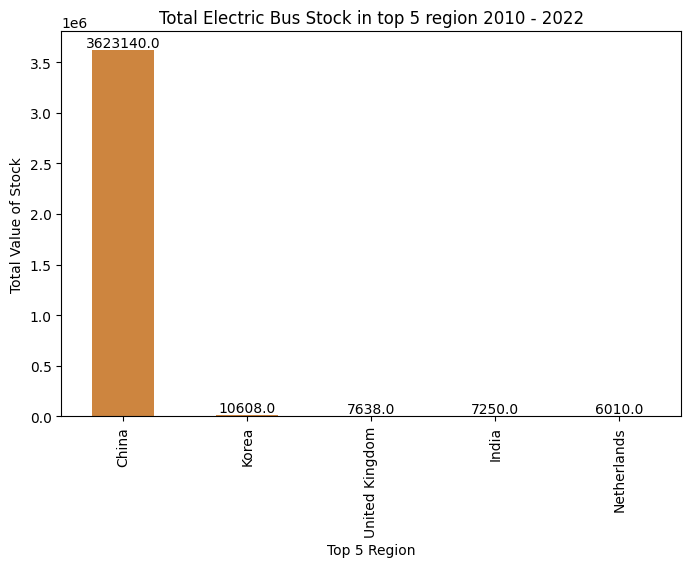

In [ ]:
df_top5_stock.loc['Total'].plot(kind='bar', figsize=(8, 5), color='peru')

for i, v in enumerate(df_top5_stock.loc['Total']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Total Electric Bus Stock in top 5 region 2010 - 2022')
plt.ylabel('Total Value of Stock')
plt.xlabel('Top 5 Region')

plt.show()

**Kesimpulan :**
- Persediaan electric bus di China sangat banyak, yaitu sejumlah 3.623.140 unit.
- Negara lainnya memiliki jumlah persediaan electric bus yang jauh lebih sedikit dibandingkan China.

In [ ]:
 #### PEMBATAS #####